In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("MP2_Data.csv") #to read the data set

In [3]:
# Dropping the ID column and separating features and target
X = data.drop(columns=['ID', 'Grade'])
y = data['Grade']

In [40]:
# Displaying Data
pd.set_option('display.max_rows', 1)
pd.set_option('display.max_columns', 5)
data.head()

,ID,Week2_Quiz1,...,Week9_Stat3,Grade
0,ML-2020-1,5.0,...,0,4


In [5]:
#Splitting data and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression (SVR)': SVR(kernel='rbf')
}

In [6]:
#evaluating models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': model_name, 'MSE': mse, 'R²': r2})
    print(f"{model_name} - MSE: {mse}, R²: {r2}")

Linear Regression - MSE: 0.9177101994409885, R²: 0.7819480920326762
Random Forest - MSE: 0.047654545454545456, R²: 0.9886770741286205
Support Vector Regression (SVR) - MSE: 0.5285066759494103, R²: 0.8744245306040674


In [7]:
#Display results in a DataFrame for comparison
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df.sort_values(by='MSE'))




Model Performance Comparison:

                             Model       MSE        R²
1                    Random Forest  0.047655  0.988677
2  Support Vector Regression (SVR)  0.528507  0.874425
0                Linear Regression  0.917710  0.781948


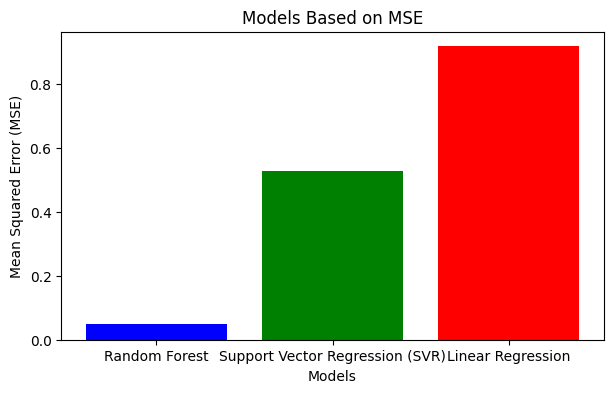

In [8]:
# Visualize the models' performance
all_models = results_df.sort_values(by='MSE').head(3)
plt.figure(figsize=(7,4))
plt.bar(all_models['Model'], all_models['MSE'], color=['blue', 'green', 'red'])
plt.title('Models Based on MSE')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [9]:
# The best and worst model
results_df = pd.DataFrame(results)
best_model_name = results_df.sort_values(by='MSE')['Model'].iloc[0]
worst_model_name = results_df.sort_values(by='MSE')['Model'].iloc[-1]
print(f"Best Model: {best_model_name}")
print(f"Worst Model: {worst_model_name}")

Best Model: Random Forest
Worst Model: Linear Regression


In [10]:
#Selecting and refitting Random Forest (best) and Linear Regression (worst)
best_model = models[best_model_name]
worst_model = models[worst_model_name]

best_model.fit(X_train, y_train)
worst_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
y_pred_worst = worst_model.predict(X_test)

Classification Report

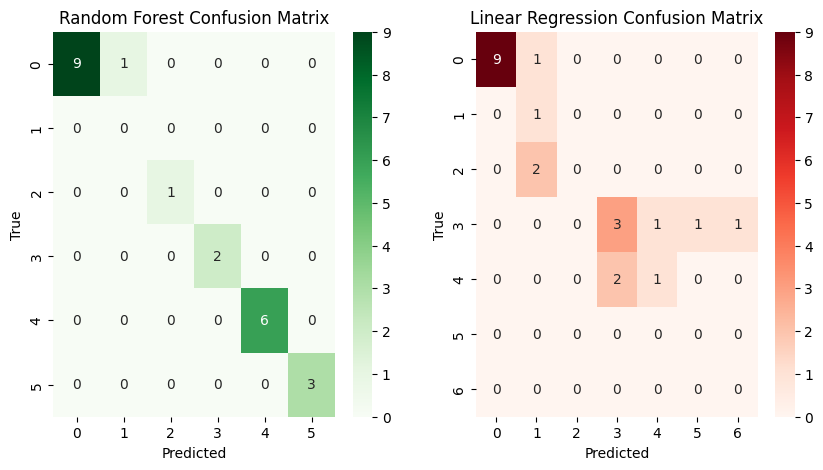

In [21]:
# Confusion Matrix
y_pred_best_class = np.rint(y_pred_best)
y_pred_worst_class = np.rint(y_pred_worst)

cm_best = confusion_matrix(y_test, y_pred_best_class)
cm_worst = confusion_matrix(y_test, y_pred_worst_class)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title(f'{best_model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_worst, annot=True, fmt='d', cmap='Reds')
plt.title(f'{worst_model_name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [12]:
print(f"Classification Report for {best_model_name}:\n", classification_report(y_test, y_pred_best_class, zero_division=0))

Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         2
         4.0       1.00      1.00      1.00         6
         5.0       1.00      1.00      1.00         3

    accuracy                           0.95        22
   macro avg       0.83      0.82      0.82        22
weighted avg       1.00      0.95      0.98        22



In [13]:
print(f"Classification Report for {worst_model_name}:\n", classification_report(y_test, y_pred_worst_class, zero_division=0))

Classification Report for Linear Regression:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         2.0       0.25      1.00      0.40         1
         3.0       0.00      0.00      0.00         2
         4.0       0.60      0.50      0.55         6
         5.0       0.50      0.33      0.40         3
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0

    accuracy                           0.64        22
   macro avg       0.34      0.39      0.33        22
weighted avg       0.70      0.64      0.65        22



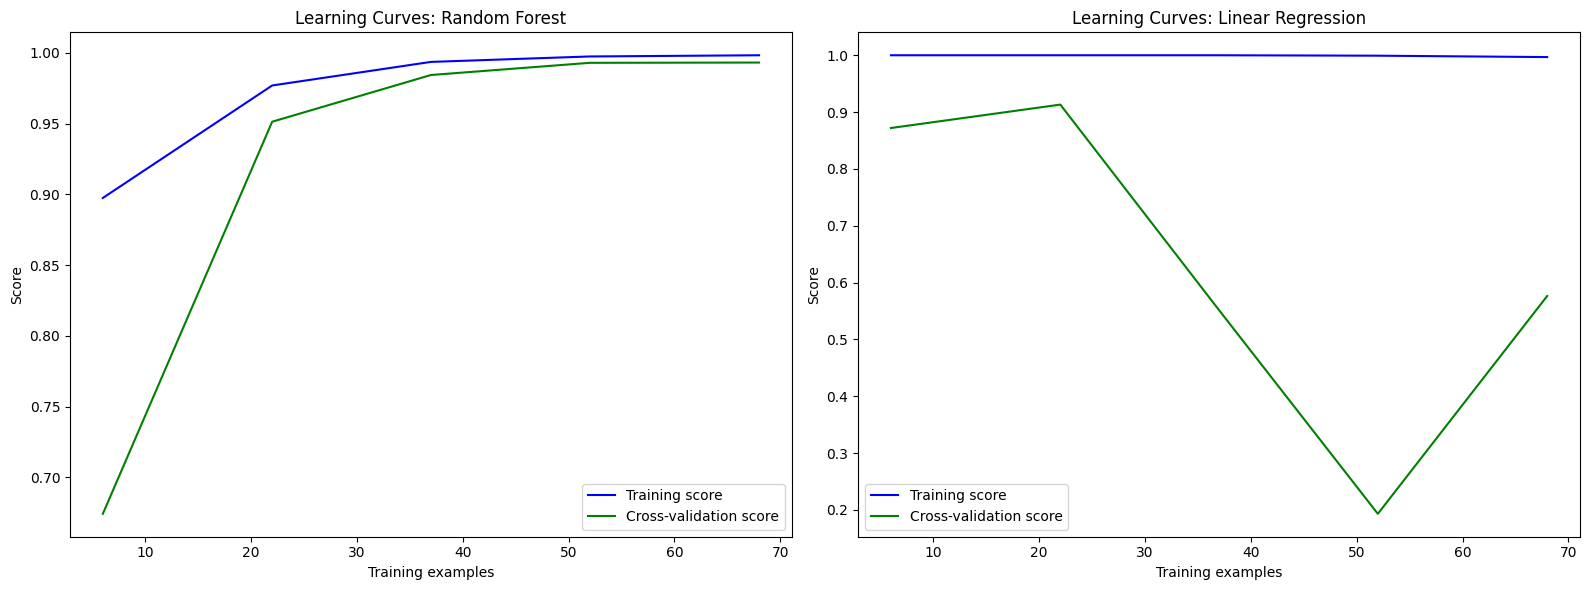

In [14]:
# Learning Curves for both models

def plot_learning_curve(model, X_train, y_train, title, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='green')
    ax.set_title(f'Learning Curves: {title}')
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

plot_learning_curve(best_model, X_train, y_train, 'Random Forest', axes[0])
plot_learning_curve(worst_model, X_train, y_train, 'Linear Regression', axes[1])

plt.tight_layout()
plt.show()

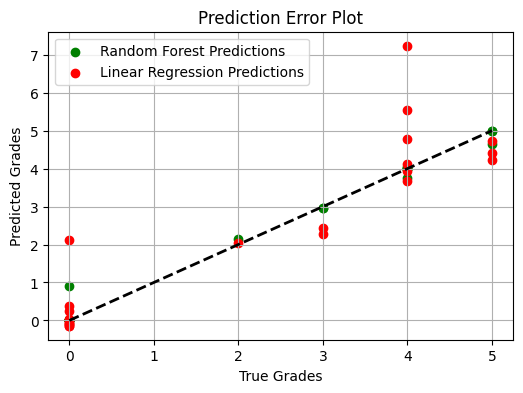

In [15]:
# Prediction Error Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_best, color='green', label=f'{best_model_name} Predictions')
plt.scatter(y_test, y_pred_worst, color='red', label=f'{worst_model_name} Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Prediction Error Plot')
plt.xlabel('True Grades')
plt.ylabel('Predicted Grades')
plt.legend()
plt.grid()
plt.show()

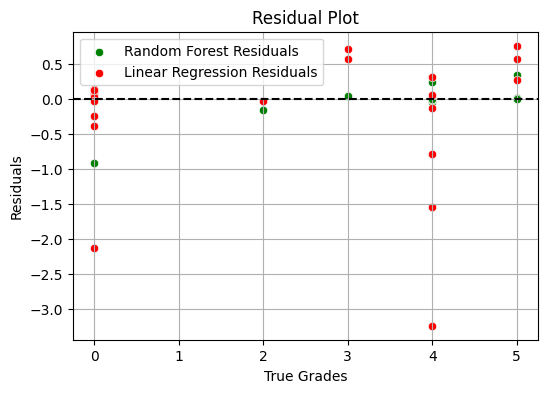

In [16]:
# Residual Plot
plt.figure(figsize=(6, 4))
residuals_best = y_test - y_pred_best
residuals_worst = y_test - y_pred_worst

sns.scatterplot(x=y_test, y=residuals_best, color='green', label=f'{best_model_name} Residuals')
sns.scatterplot(x=y_test, y=residuals_worst, color='red', label=f'{worst_model_name} Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('True Grades')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

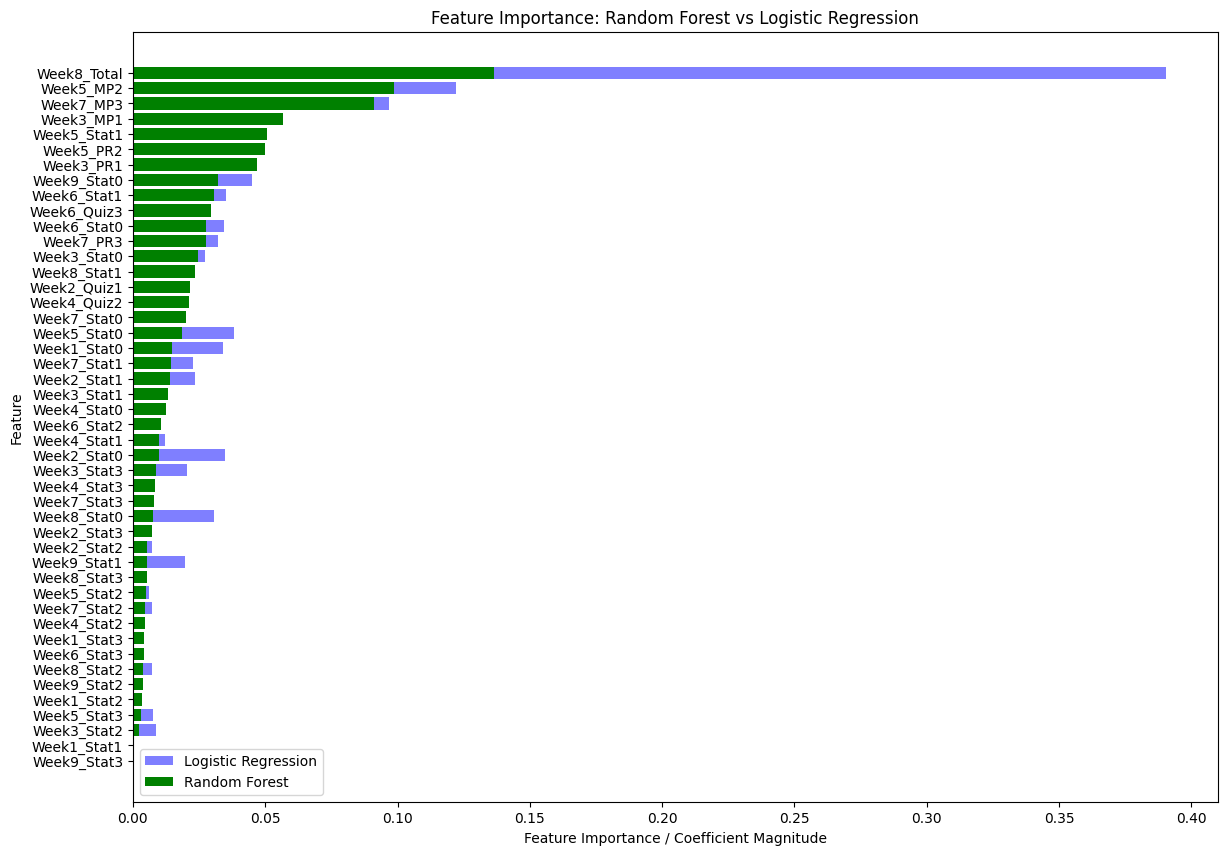

In [17]:
#Performace Evaluation (Feature)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
coefficients = lr_model.coef_[0]

# DF for Random Forest feature importances
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance (Random Forest)': feature_importances
})

# DF for Logistic Regression coefficients
lr_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (Logistic Regression)': coefficients
})

#Merging DFs
importance_df = pd.merge(rf_importance_df, lr_importance_df, on='Feature')
importance_df = importance_df.sort_values(by='Importance (Random Forest)', ascending=False)
plt.figure(figsize=(14, 10))

plt.barh(importance_df['Feature'], np.abs(importance_df['Coefficient (Logistic Regression)']), color='blue', alpha=0.5, label='Logistic Regression')
plt.barh(importance_df['Feature'], importance_df['Importance (Random Forest)'], color='green', label='Random Forest')

plt.xlabel('Feature Importance / Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance: Random Forest vs Logistic Regression')
plt.legend(loc='best')
plt.gca().invert_yaxis()  # Displays the most important features on top
plt.show()

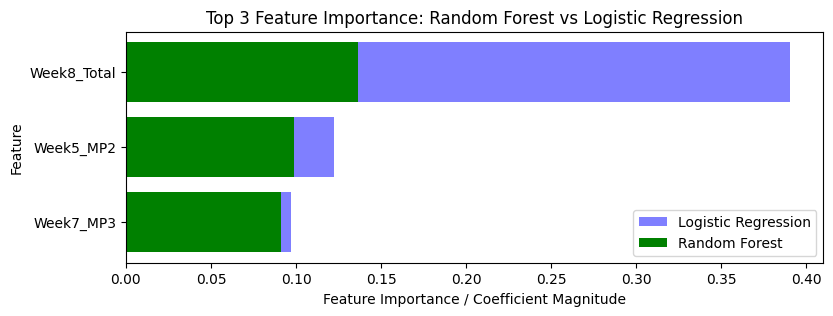



        Feature  Importance (Random Forest)  Coefficient (Logistic Regression)
9  Week8_Total                    0.136485                          -0.390476
3    Week5_MP2                    0.098557                          -0.122082
5    Week7_MP3                    0.090936                          -0.096895


In [27]:
# Visualize Top 3 Features
top_3_features = importance_df.head(3)

plt.figure(figsize=(9,3))
plt.barh(top_3_features['Feature'], np.abs(top_3_features['Coefficient (Logistic Regression)']), color='blue', alpha=0.5, label='Logistic Regression')
plt.barh(top_3_features['Feature'], top_3_features['Importance (Random Forest)'], color='green', label='Random Forest')
plt.xlabel('Feature Importance / Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top 3 Feature Importance: Random Forest vs Logistic Regression')
plt.legend(loc='best')
plt.gca().invert_yaxis()
plt.show()

print("\n\n",top_3_features)